# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
# 데이터 프라임 불러오기
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      25 non-null     object 
 1   정류장수     25 non-null     int64  
 2   노선수      25 non-null     int64  
 3   승차총승객수   25 non-null     int64  
 4   하차총승객수   25 non-null     int64  
 5   승차평균승객수  25 non-null     float64
 6   하차평균승객수  25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.5+ KB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   자치구             25 non-null     object 
 1   평균 이동 시간(분) 합   25 non-null     int64  
 2   평균 이동 시간(분) 평균  25 non-null     float64
 3   이동인구(합) 합       25 non-null     float64
 4   이동인구(합) 평균      25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df_seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구                   26 non-null     object
 1   택시운송업 사업체수            26 non-null     int64 
 2   택시운송업 종사자수            26 non-null     int64 
 3   한식 일반 음식점업 사업체수       26 non-null     int64 
 4   한식 일반 음식점업 종사자수       26 non-null     int64 
 5   용달 화물자동차 운송업 사업체수     26 non-null     int64 
 6   용달 화물자동차 운송업 종사자수     26 non-null     int64 
 7   부동산 중개 및 대리업 사업체수     26 non-null     int64 
 8   부동산 중개 및 대리업 종사자수     26 non-null     int64 
 9   두발미용업 사업체수            26 non-null     int64 
 10  두발미용업 종사자수            26 non-null     int64 
 11  커피전문점 사업체수            26 non-null     int64 
 12  커피전문점 종사자수            26 non-null     int64 
 13  남녀용 겉옷 및 셔츠 도매업 사업체수  26 non-null     int64 
 14  남녀용 겉옷 및 셔츠 도매업 종사자수  26 non-null     int64 
 15  기타주점업 사업체수            26 non-null     int6

In [7]:
df_seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       25 non-null     object 
 1   세대        25 non-null     int64  
 2   총인구       25 non-null     int64  
 3   남자        25 non-null     int64  
 4   여자        25 non-null     int64  
 5   한국인       25 non-null     int64  
 6   한국남자      25 non-null     int64  
 7   한국여자      25 non-null     int64  
 8   외국인       25 non-null     int64  
 9   외국남자      25 non-null     int64  
 10  외국여자      25 non-null     int64  
 11  세대당인구     25 non-null     float64
 12  65세이상고령자  25 non-null     int64  
 13  노인비율      25 non-null     float64
dtypes: float64(2), int64(11), object(1)
memory usage: 2.9+ KB


In [8]:
# 데이터 프라임 합치기
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   도착 시군구 코드             25 non-null     int64  
 1   자치구                   25 non-null     object 
 2   세대                    25 non-null     int64  
 3   총인구                   25 non-null     int64  
 4   남자                    25 non-null     int64  
 5   여자                    25 non-null     int64  
 6   한국인                   25 non-null     int64  
 7   한국남자                  25 non-null     int64  
 8   한국여자                  25 non-null     int64  
 9   외국인                   25 non-null     int64  
 10  외국남자                  25 non-null     int64  
 11  외국여자                  25 non-null     int64  
 12  세대당인구                 25 non-null     float64
 13  65세이상고령자              25 non-null     int64  
 14  노인비율                  25 non-null     float64
 15  택시운송업 사업체수            25 

In [10]:
df_new = df.loc[:,['자치구','노선수','승차총승객수','평균 이동 시간(분) 평균','택시운송업 종사자수' ]]

In [11]:
df_new.columns = ['자치구','노선수','승차총승객수','평균이동 평균','택시종사자수' ]
df_new

,자치구,노선수,승차총승객수,평균이동 평균,택시종사자수
0,종로구,106,5468935,21.867754,215
1,중구,103,3776675,21.524817,235
2,용산구,67,4189977,21.820458,523
3,성동구,58,2807280,22.150334,2527
4,광진구,41,2749448,22.810568,1744
5,동대문구,73,5240565,22.149241,2093
6,중랑구,48,3792541,23.887741,6262
7,성북구,99,6236424,22.716321,2643
8,강북구,67,4825181,24.355289,2589
9,도봉구,46,3304305,25.138206,5783


## 



## 상관계수 분석

In [12]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# 열의 인덱스를 사용하여 'column_2'를 삭제
df2 = df
df2.drop('자치구', axis=1, inplace=True)

<AxesSubplot:title={'center':'subset1'}>

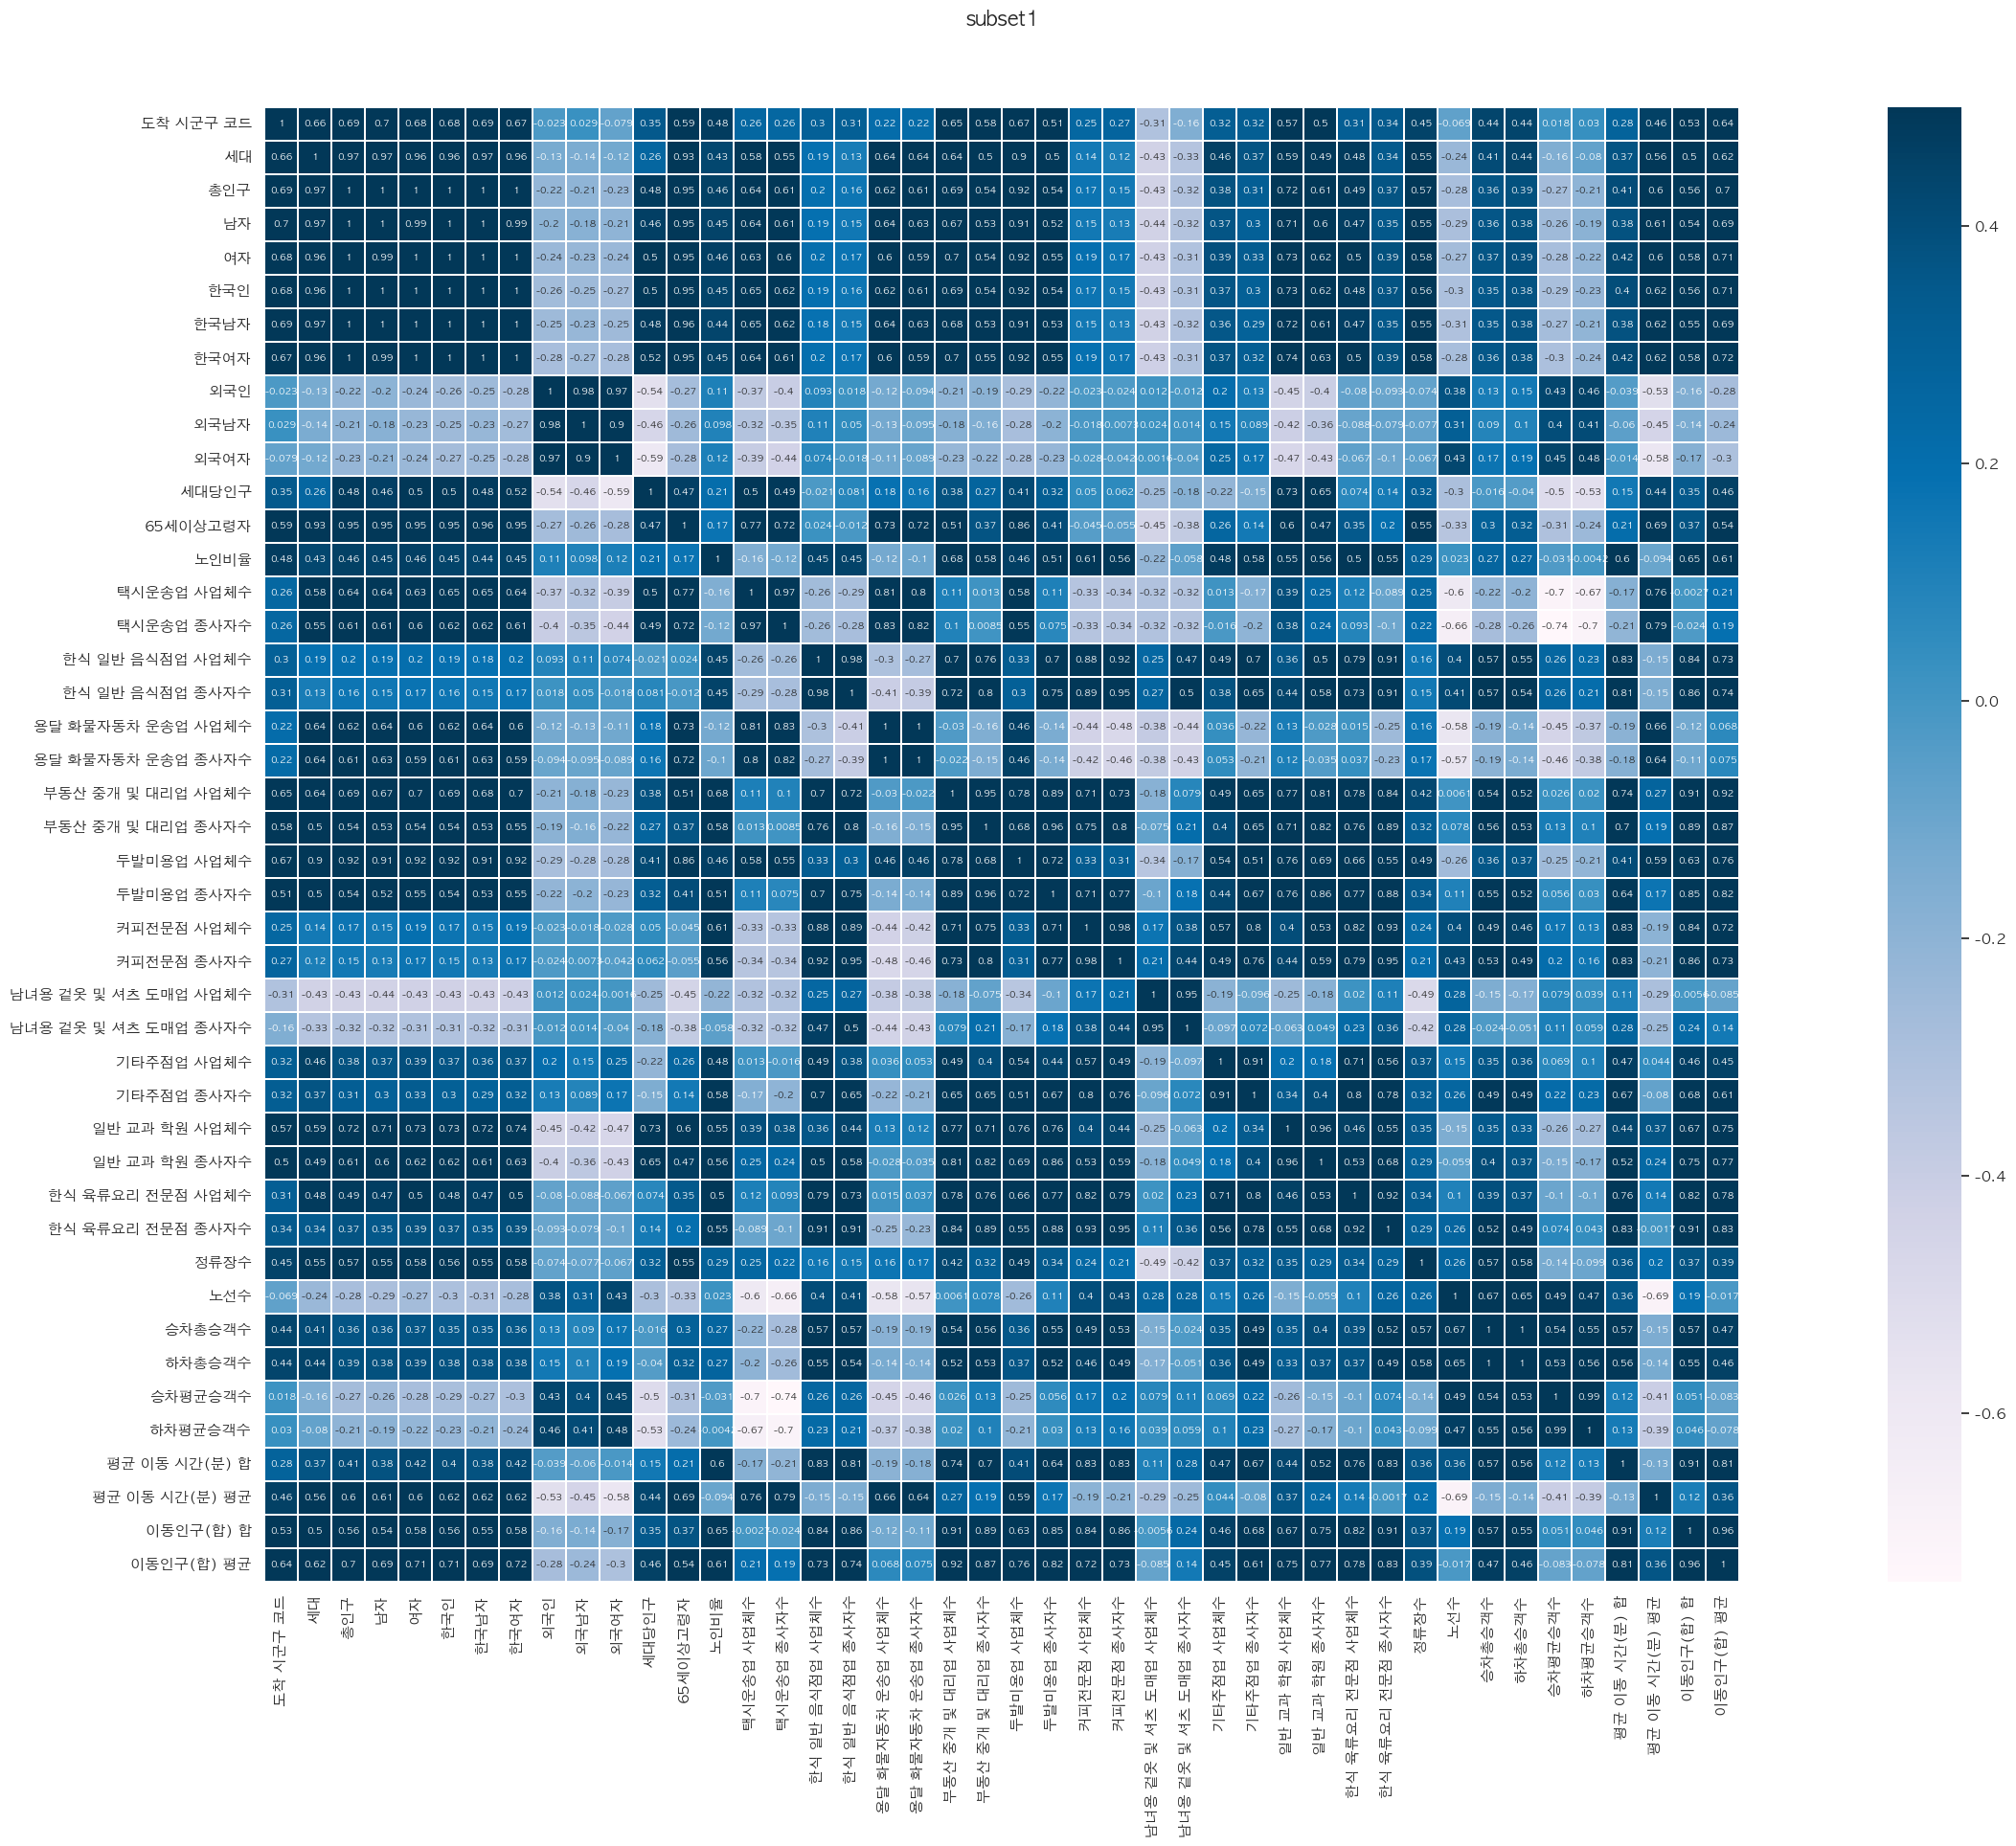

In [14]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 1)

colormap = plt.cm.PuBu
plt.figure(figsize=(40, 20))
plt.title("subset1", y = 1.05, size = 15)
sns.heatmap(df2.astype(float).corr(), linewidths = 0.1, vmax = 0.5,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

In [15]:
from scipy.stats import pearsonr
pearsonr(df['외국여자'],df['노선수'])

PearsonRResult(statistic=0.43013242869760304, pvalue=0.031859869237207704)

In [16]:
df_sum = df[['외국여자','용달 화물자동차 운송업 사업체수','한식 일반 음식점업 종사자수','커피전문점 종사자수']].describe()
df_sum

,외국여자,용달 화물자동차 운송업 사업체수,한식 일반 음식점업 종사자수,커피전문점 종사자수
count,25.000000,25.00000,25.00000,25.000000
mean,4921.800000,1139.76000,4007.32000,2292.880000
std,2894.481502,479.06726,2132.72849,1452.869383
min,1278.000000,300.00000,2009.00000,837.000000
25%,2222.000000,802.00000,2663.00000,1375.000000
50%,4856.000000,1281.00000,2987.00000,1748.000000
75%,6513.000000,1528.00000,4705.00000,3295.000000
max,11117.000000,1910.00000,11486.00000,7273.000000


In [17]:
pearsonr(df['용달 화물자동차 운송업 사업체수'],df['노선수'])

PearsonRResult(statistic=-0.576135888689241, pvalue=0.0025775192579727143)

In [18]:
pearsonr(df['커피전문점 사업체수'],df['노선수'])

PearsonRResult(statistic=0.3952739247006174, pvalue=0.0505040593417431)

In [19]:
pearsonr(df['평균 이동 시간(분) 합'],df['노선수'])

PearsonRResult(statistic=0.3605000532735534, pvalue=0.07667781622760955)

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
노선 수와 승차 총 승객은 관련이 없다.

* 가설 2
노선 수와 택시운송업 종사자 수는 관련이 없다.

* 가설 3
노선 수와 평균 이동시간은 관련이 없다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [20]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

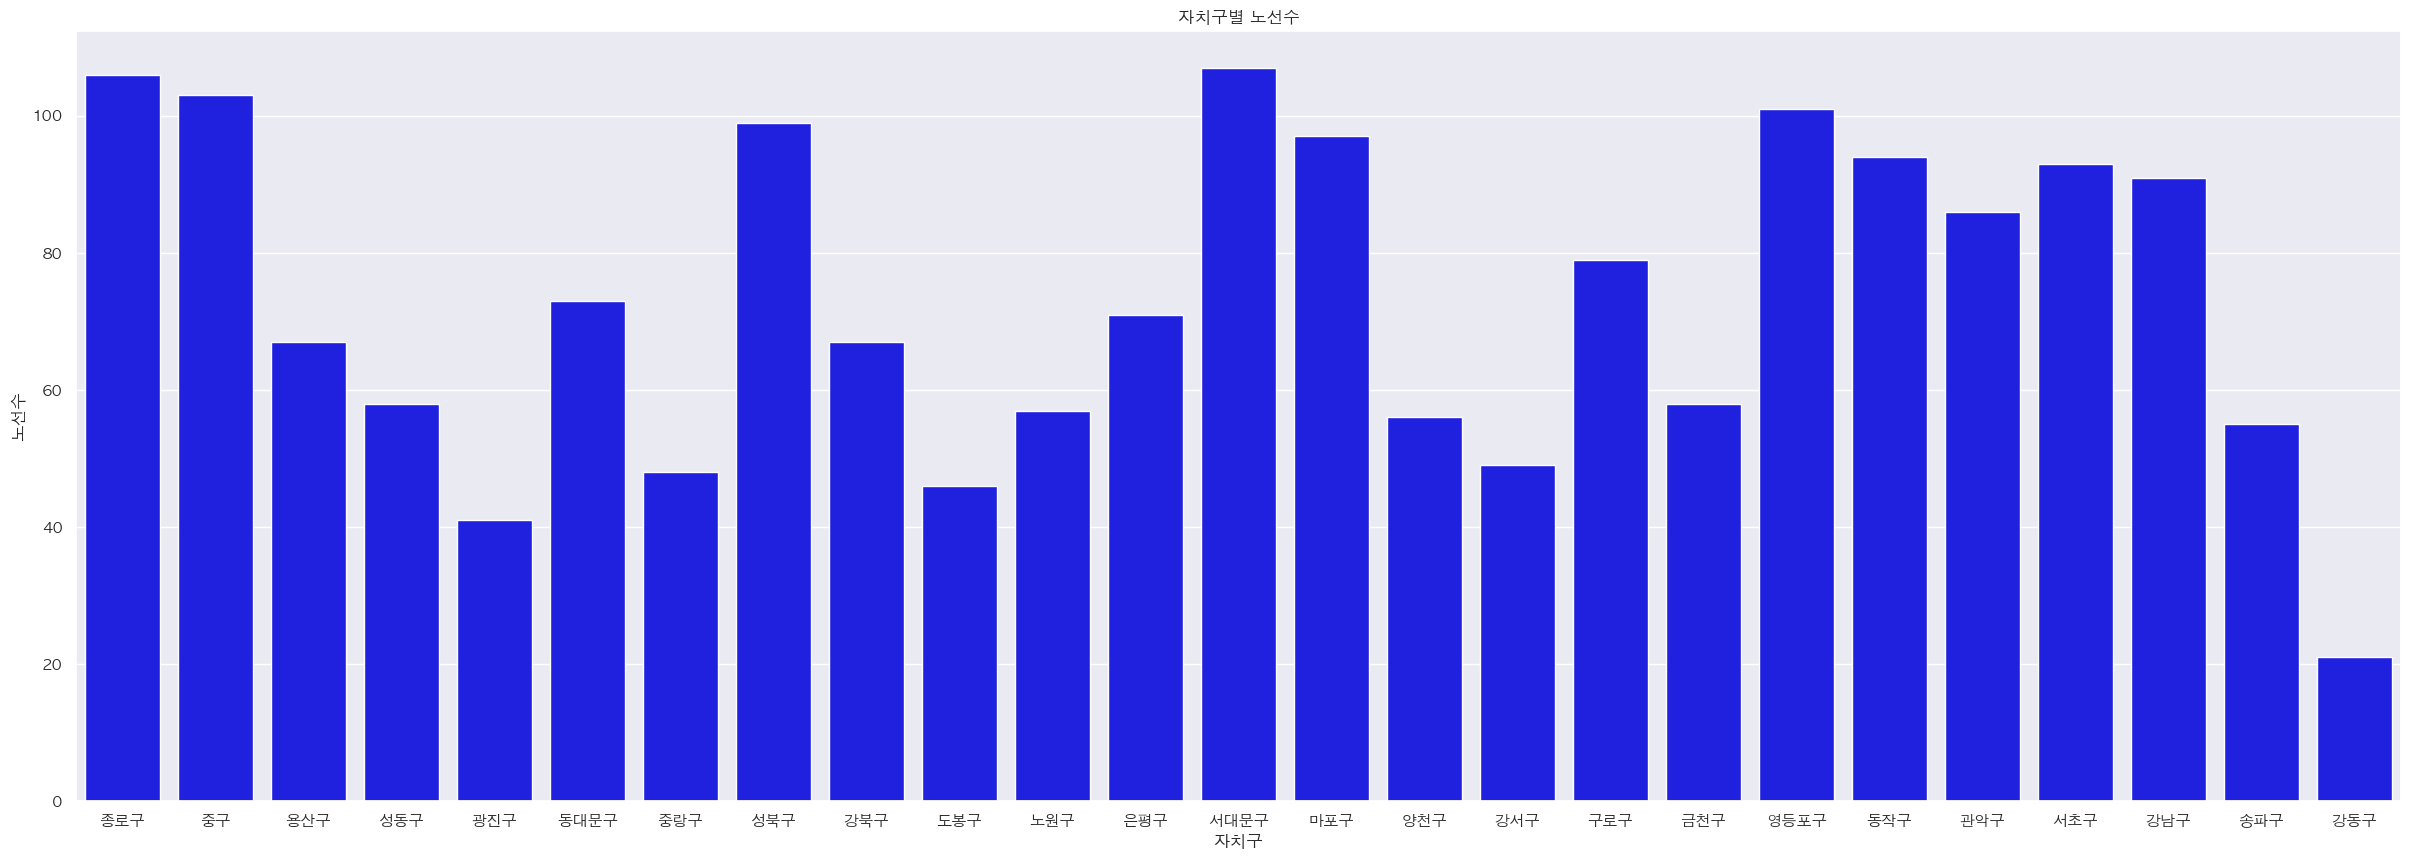

In [21]:
# Figure 크기 조절
plt.figure(figsize=(30, 10))

# 막대 그래프 그리기
sns.barplot(x=df_new['자치구'], y=df_new['노선수'], color='blue')

# 그래프 제목과 라벨 추가
plt.title('자치구별 노선수')
plt.xlabel('자치구')
plt.ylabel('노선수')

# 그래프 표시
plt.show()

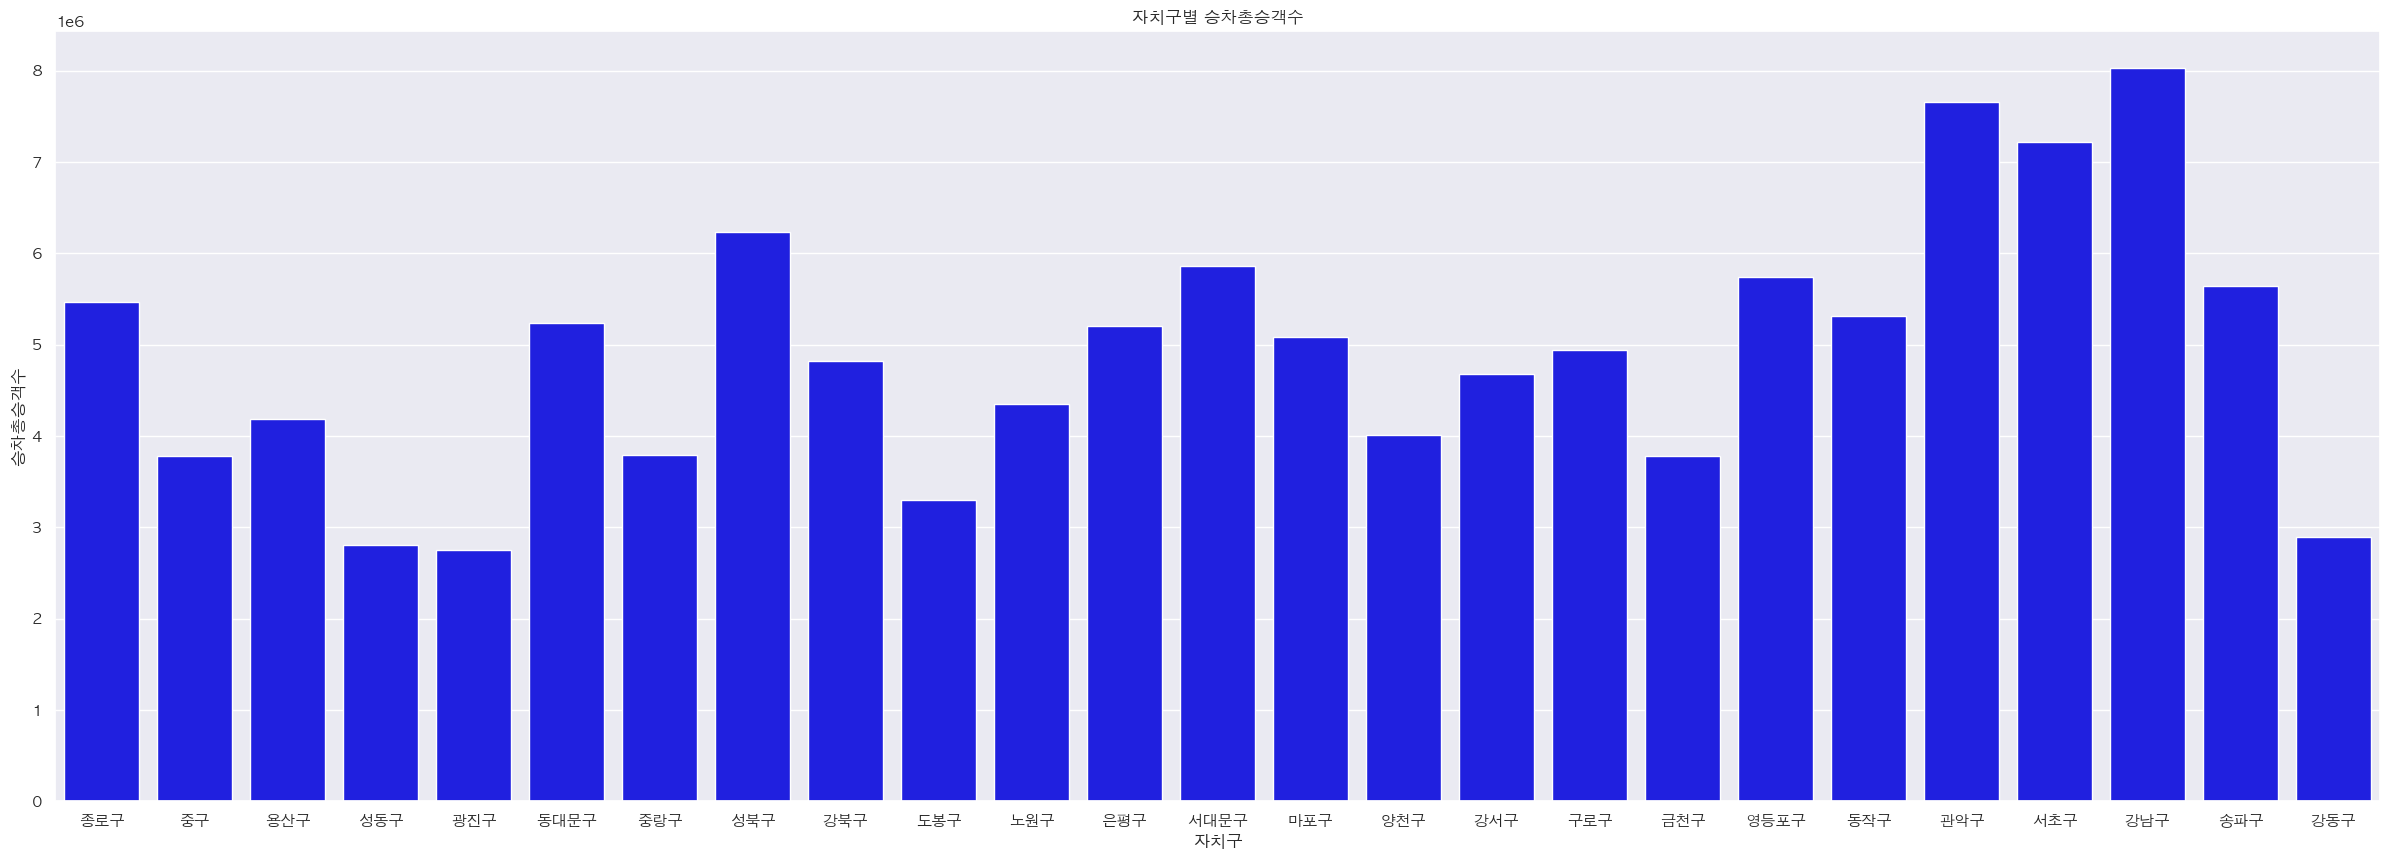

In [22]:
# Figure 크기 조절
plt.figure(figsize=(30, 10))

# 막대 그래프 그리기
sns.barplot(x=df_new['자치구'], y=df_new['승차총승객수'], color='blue')

# 그래프 제목과 라벨 추가
plt.title('자치구별 승차총승객수')
plt.xlabel('자치구')
plt.ylabel('승차총승객수')

# 그래프 표시
plt.show()

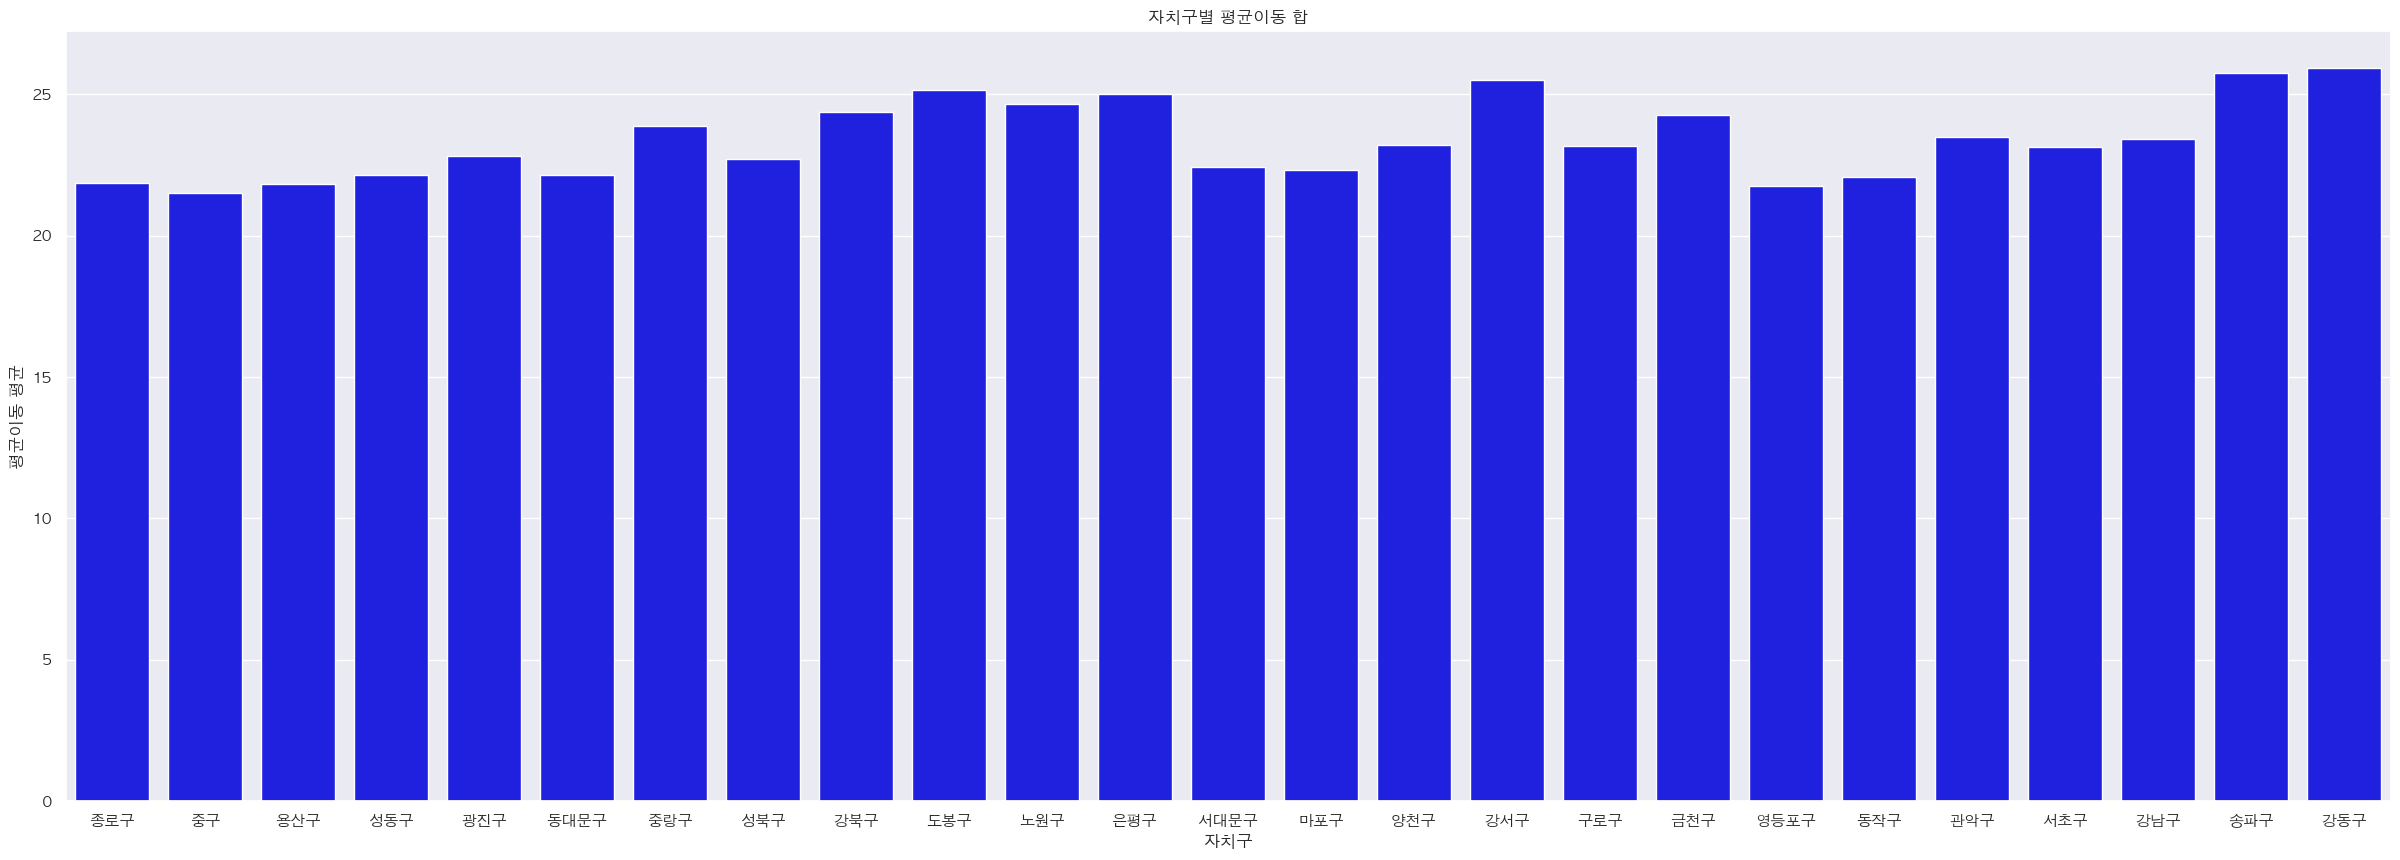

In [23]:
# Figure 크기 조절
plt.figure(figsize=(30, 10))

# 막대 그래프 그리기
sns.barplot(x=df_new['자치구'], y=df_new['평균이동 평균'], color='blue')

# 그래프 제목과 라벨 추가
plt.title('자치구별 평균이동 합')
plt.xlabel('자치구')
plt.ylabel('평균이동 평균')

# 그래프 표시
plt.show()

### 1) 자치구별 노선수는 강동 , 강서 ,광진구에서 적다


### 2) 자치구별 승차총승객수는 광진 , 성동 , 강동구에서 적게 나타난다.

### 3) 자치구별 평균이동 시간은 금천구 , 도봉구에서 적게 나타난다.

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [24]:
df_new.drop('자치구', axis=1, inplace=True)
df_new.corr()

,노선수,승차총승객수,평균이동 평균,택시종사자수
노선수,1.000000,0.665488,-0.693565,-0.658988
승차총승객수,0.665488,1.000000,-0.146534,-0.279193
평균이동 평균,-0.693565,-0.146534,1.000000,0.788427
택시종사자수,-0.658988,-0.279193,0.788427,1.000000


In [25]:
pearsonr(df_new['승차총승객수'],df_new['노선수'])

PearsonRResult(statistic=0.6654877832095702, pvalue=0.00028308622857719856)

In [26]:
pearsonr(df_new['평균이동 평균'],df_new['노선수'])

PearsonRResult(statistic=-0.6935652960828838, pvalue=0.00012083974762338671)

In [27]:
pearsonr(df_new['택시종사자수'],df_new['노선수'])

PearsonRResult(statistic=-0.658988027233334, pvalue=0.0003405071992593473)

### 1) 노선수와 승차 총 승객수는 0.66의 강한 양의 상관관계 , pvalue 0.00028로써 유의수준(5%)를 넘지않는다.

### 2) 노선수와 평균 이동 시간은 -0.69의 강한 음의 상관관계 , pvalue 0.00012로써 유의수준(5%)를 넘지않는다.

### 3) 노선수와 택시종사자 수는 -0.65의 강한 음의 상관관계 , pvalue 0.00034로써 유의수준(5%)를 넘지않는다.

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



<AxesSubplot:title={'center':'subset1'}>

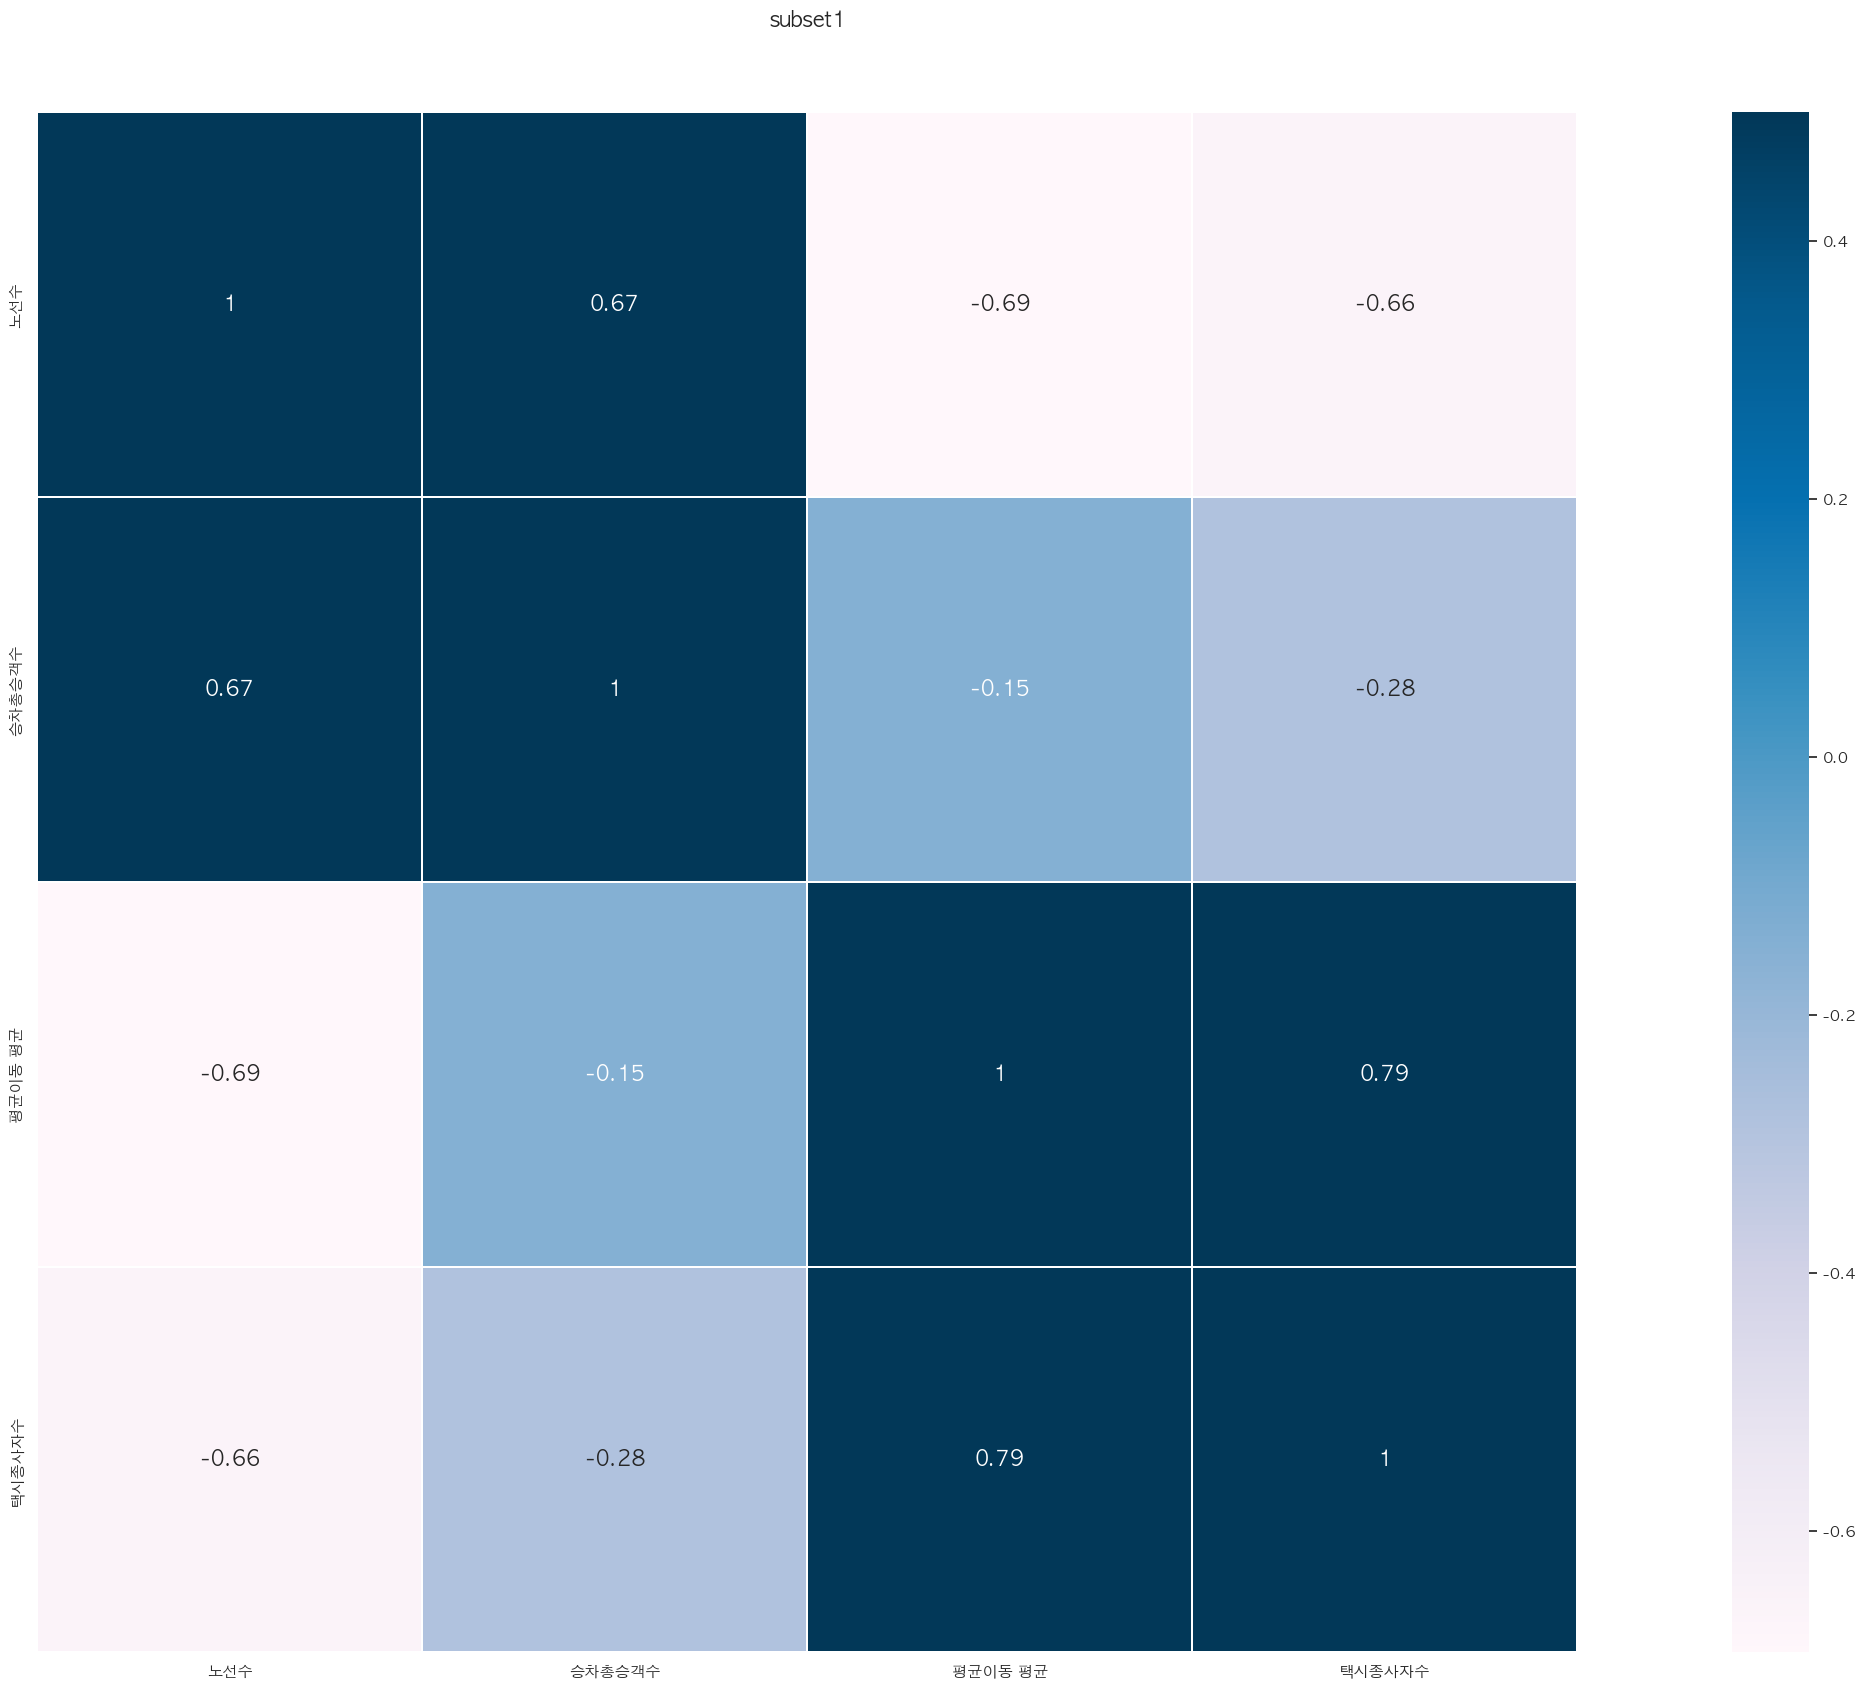

In [28]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 1)

colormap = plt.cm.PuBu
plt.figure(figsize=(40, 20))
plt.title("subset1", y = 1.05, size = 15)
sns.heatmap(df_new.astype(float).corr(), linewidths = 0.1, vmax = 0.5,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 15})

In [29]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 노선수와 승차 총 승객수는 0.67의 강한 양의 상관관계를 보인다.
# 2. 노선수와 평균이동 시간은 -0.69의 강한 음의 상관관계를 보인다.
# 3. 노선수와 택시종사자수는 -0.66의 강한 음의 상관관계를 보인다.